In [54]:
import numpy as np 
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from solvers import ValueIteration
from rocky_road import RockyRoad
from env_wrapper import EnvironmentWrapper

In [55]:
def analyze_policy(env, policy):
    severities = [i for i in range(env.max_acc_sev)]
    actions, action_names = env.actions, env.action_names
    action_data = {f"{action_names[action]}": np.zeros(len(severities)) for action in actions}

    # bar chart
    for state, action in policy.items(): 
        if state not in env.goal_states and state not in env.terminal_states: 
            env_state, sev_lvl = state
            sev_idx = severities.index(sev_lvl) 
            act_name = action_names[action]
            action_data[act_name][sev_idx] += 1



# bar plot of policy
def plot_policy_bar(env, policy):
    env_states = []
    sevs = []
    for state in env.states: 
        env_state, sev = state 
        if env_state not in env_states: 
            env_states.append(env_state)
        if sev not in sevs: 
            sevs.append(sev)

    colors = ['g', 'y', 'c', 'b', 'r']
    yticks = sevs 
    xticks = env_states

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Environmental state')
    ax.set_ylabel('Severity')
    ax.set_zlabel('Action')
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.set_zticks([0,1])

    data = {action: [] for action in env.actions}
    for state, action in policy.items():
        if state in policy and state not in env.goal_states and state not in env.terminal_states:  
            data[action].append(state)

    handles, labels = [], []

    for action in env.actions: 
        states = data[action]
        if len(states) != 0:
            xs = [state[0] for state in states]
            ys = np.ones(len(xs))
            zs = [state[1] for state in states]
            cs = [colors[action]] * len(xs)

            ax.bar(xs, ys, zs, zdir='y', 
                color=cs, alpha=0.8, label=f"Action {action}")
        
    #ax.legend([f"Action {i}" for i in env.actions])
    ax.legend()
    plt.show()


# scatter plot of policy
def plot_policy_scatter(env, policy):
    env_states = []
    sevs = []
    for state in env.states: 
        env_state, sev = state 
        if env_state not in env_states: 
            env_states.append(env_state)
        if sev not in sevs: 
            sevs.append(sev)

    colors = ['g', 'y', 'c', 'b', 'r']

    xticks = sevs 
    yticks = [state[0][1] for state in env.states]


    fig = plt.figure(figsize=(8,12))
    ax = fig.add_subplot(111)
    ax.set_ylabel('Environmental state')
    ax.set_xlabel('Severity')
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)

    data = {action: [] for action in env.actions}
    for state, action in policy.items(): 
        if state in policy and state not in env.goal_states and state not in env.terminal_states: 
            data[action].append(state)

    for action in env.actions: 
        states = data[action]
        if len(states) != 0: 
            xs = [state[1] for state in states]
            ys = [state[0][1] for state in states]
            cs = [colors[action]] * len(xs) 

            ax.scatter(xs, ys, c=cs, alpha=1, s=100, label=f"Action {action}")

    #ax.legend([f"Action {i}" for i in env.actions])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5)
    #ax.legend()
    plt.show()



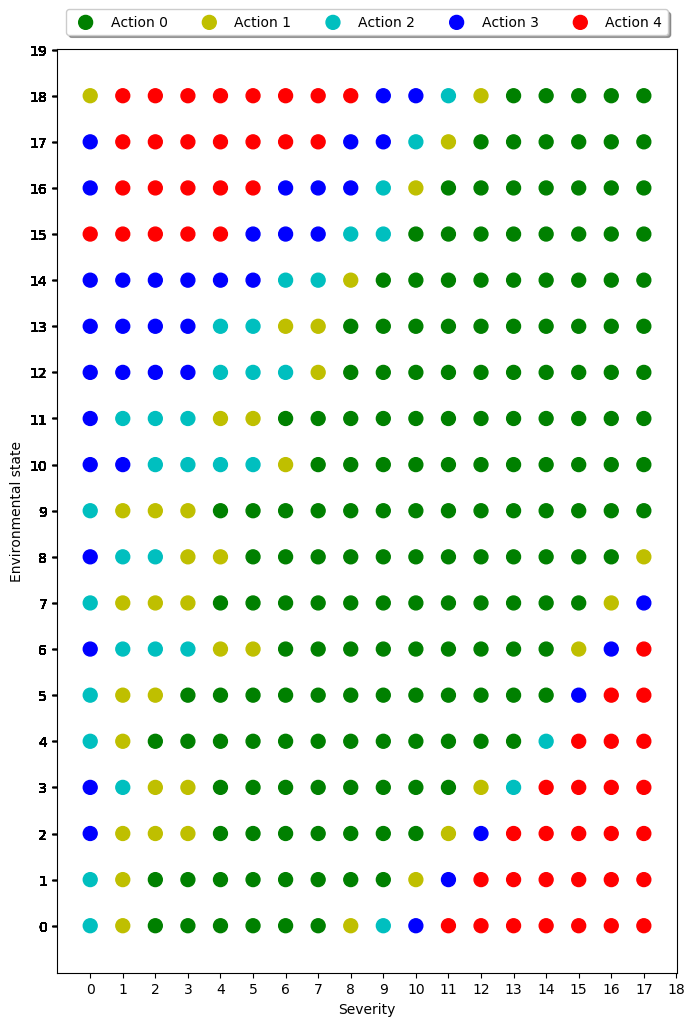

In [99]:
ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 3,
    "action_costs": [1, 3, 6],
    "nom_success_rate": 0.75,
    "risky_decline_factor": 0.9,
    "severity_decline_factor": 1,
    "skew_factor": 1,
    "goal_reward": 200,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}

ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": [1, 3, 6, 10, 15],
    "nom_success_rate": 0.9, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.9,
    "severity_decline_factor": 1,
    "skew_factor": 1,
    "goal_reward": 400,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 18,
    "query_cost": 1,
    "severity_penalty_weight": 2,
    "recovery_rate": 0.1,
    "true_obs_prob": 0.2,
}

rr = RockyRoad(environment_info=ENV_INFO)
env = EnvironmentWrapper(rr, exp_info=EXP_INFO)

vi = ValueIteration(env)
V, Q, policy = vi.run()

analyze_policy(env, policy)

print_policy = False
if print_policy:
    prev_state = (0,0)
    for (sidx, state) in enumerate(env.states): 
        if state in policy and state not in env.goal_states and state not in env.terminal_states: 
            if state[0] != prev_state[0]:
                print("\n\n")
            print("\nState: ", state)
            action = policy[state]
            print("Action: ", env.action_names[action])
            print("Q: ", Q[sidx])
            prev_state = state


# plot policy 

#plot_policy_bar(toy, policy)
plot_policy_scatter(env, policy)